In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

In [5]:
# Load the dataset
df = pd.read_csv('../manager-course-completion-by-user.csv')

# Filter AP CSP Courses
courses = [
	'Getting Started (AP CSP CodeCombat)',
	'Module 1 (AP CSP CodeCombat) - Course Overview',
	'Module 2 (AP CSP CodeCombat) - Recruitment Strategies',
	'Module 3 (AP CSP CodeCombat) - The Structure of Quests',
	'Module 4 (AP CSP CodeCombat) - Customizing the Course:  Part 1',
	'Module 5 (AP CSP CodeCombat) - Customizing the Course: Part 2',
	'Module 6 (AP CSP CodeCombat) - The Create Task',
	'Module 7 (AP CSP CodeCombat) - The Multiple Choice Exam',
	'Module 8 (AP CSP CodeCombat) - Completing the Course Audit',
 '(Optional) Module 9 (AP CSP CodeCombat) - Exploring CodeCombat Capstone Projects'
]

df = df[df['Course'].isin(courses)]

# Remove rows with email sonia@codecombat.com
df = df[df['Email'] != 'sonia@codecombat.com']

# Convert 'Time Spent' to minutes for easier analysis
df['Time Spent (min)'] = df['Time Spent (h mm)'].apply(lambda x: int(x.split('h')[0]) * 60 + int(x.split('h')[1].replace('m', '')))
df['Time Spent (h)'] = df['Time Spent (min)'] / 60

# Handling NaN values - here, we'll drop rows where essential information is missing. Adapt this as necessary.
# df.dropna(subset=['Date Completed', 'Time Spent (min)', 'Average Score', 'Progress (Percent)'], inplace=True)

In [7]:
df['Email'].unique().shape

(233,)

In [21]:
df.columns

Index(['UserID', 'User Details', 'Username', 'Email', 'User Groups',
       'First Name', 'Last Name', 'CourseID', 'Course', 'Language',
       'Training Mode', 'Due Date', 'Date Completed', 'Time Completed',
       'Completion Date', 'Required Lessons Completed', 'Required Lessons',
       'Time Spent', 'Time Spent (h mm)', 'Average Score', 'Progress',
       'Progress (%)', 'Progress (Percent)', 'Full name',
       'Time Spent (minutes)', 'User Status', 'Assigned Status',
       'SECONDARY_DISPLAY_NAME', 'Completed Version', 'Published Version',
       'Time Spent (min)'],
      dtype='object')

In [16]:
df['Progress (Percent)'].unique()

array([100,  55,   0,  64,   9,  38,  50,  82,  17,  18,  77,  75,  73,
        54,  15,  36,  27,  45,  67,  40,  25,  60,  33,  83,  69,  20])

In [3]:
grouped = df.groupby('Course')

# Descriptive Statistics

## 1. Five Number Summary

In [19]:
# Descriptive statistics for numerical columns
print(df[['Time Spent (min)', 'Average Score', 'Progress (Percent)']].describe())

       Time Spent (min)  Average Score  Progress (Percent)
count        597.000000     597.000000               597.0
mean          40.974874      93.680067               100.0
std           50.456583      10.256107                 0.0
min            1.000000      25.000000               100.0
25%           10.000000      90.000000               100.0
50%           23.000000     100.000000               100.0
75%           53.000000     100.000000               100.0
max          501.000000     100.000000               100.0


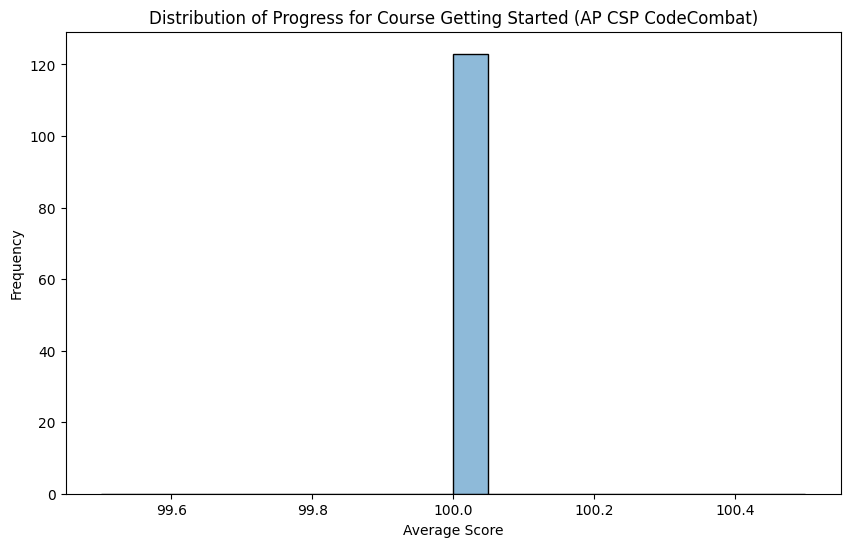

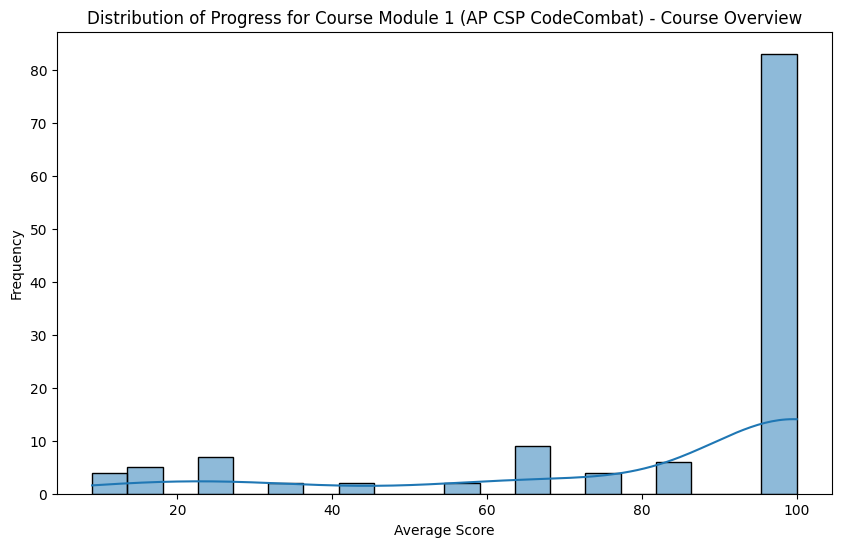

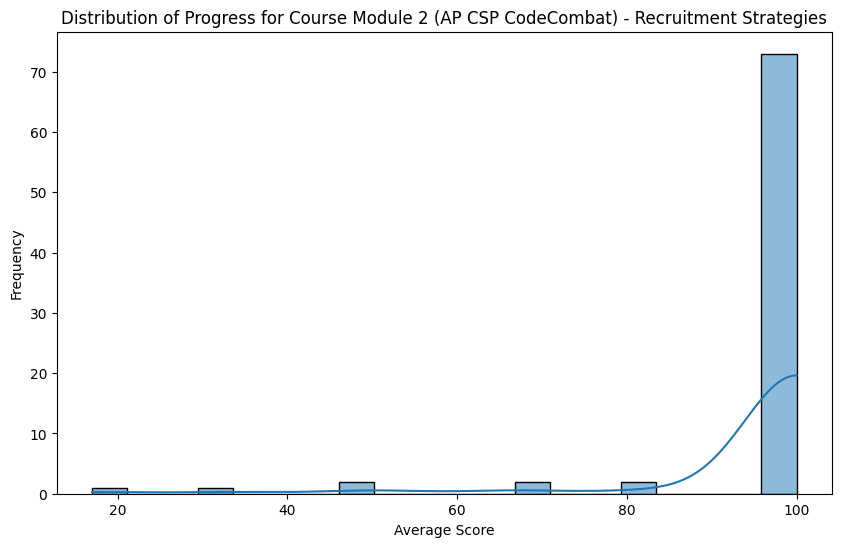

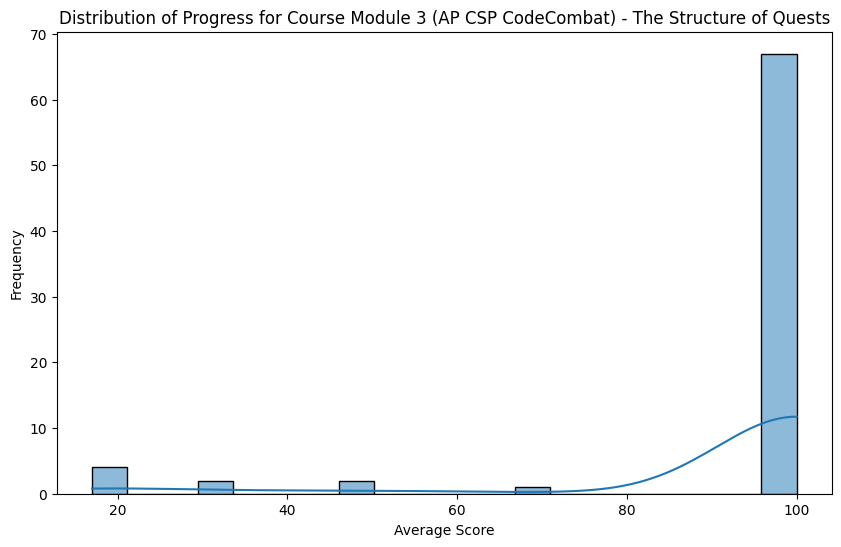

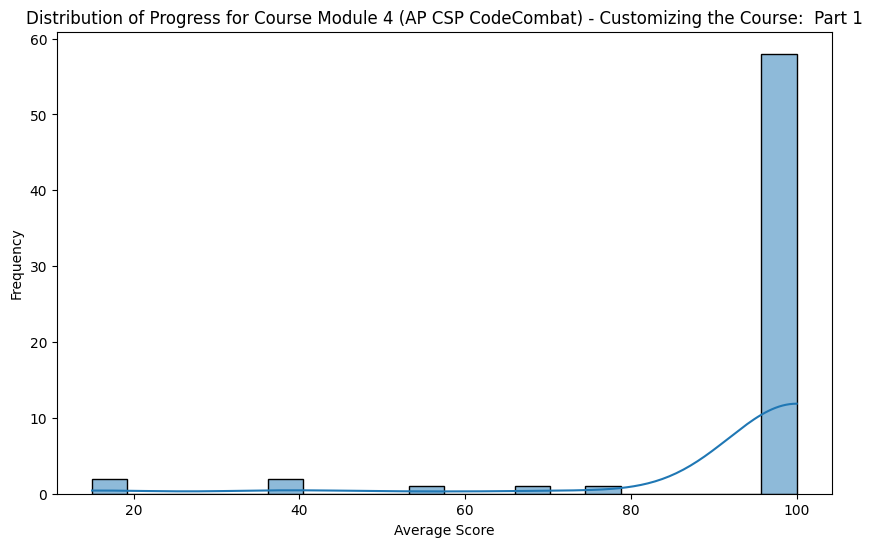

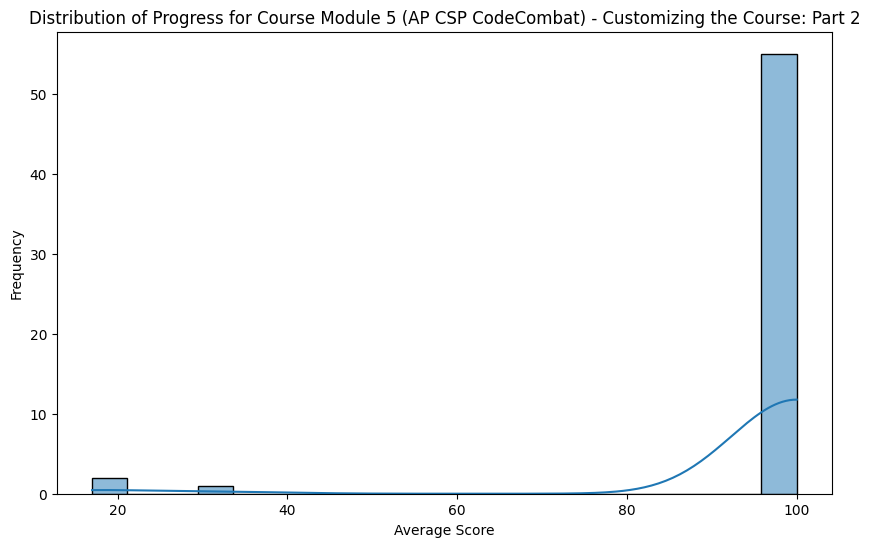

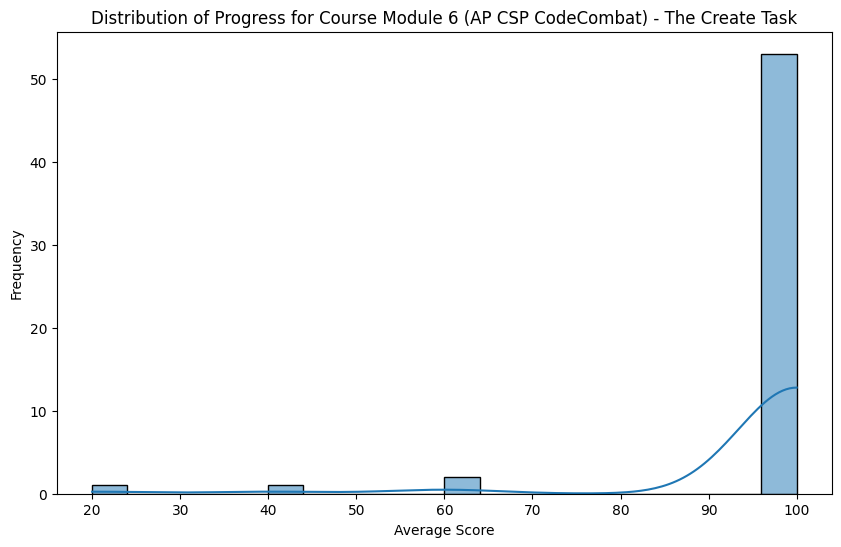

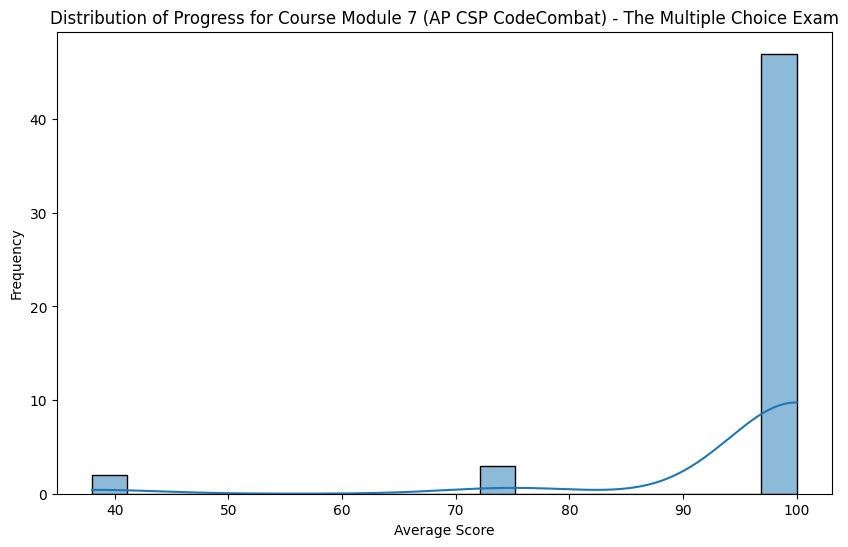

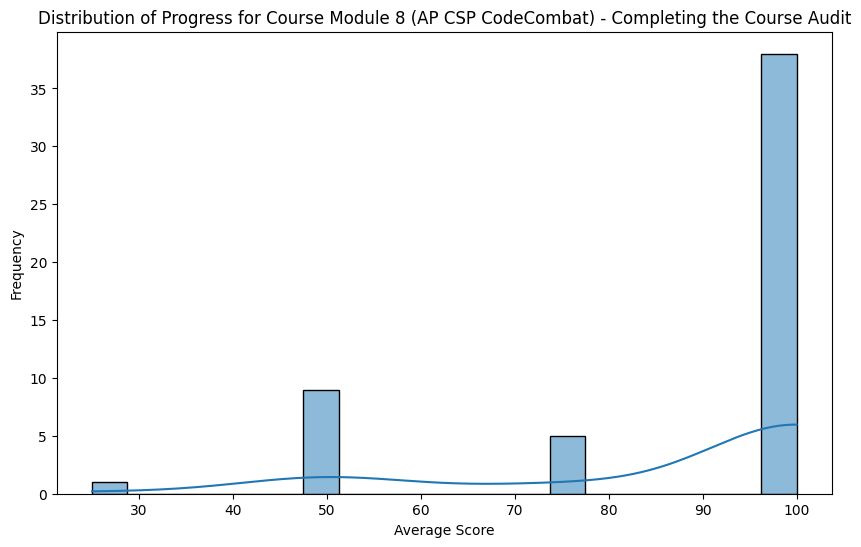

In [4]:

for course, data in grouped:
    plt.figure(figsize=(10, 6))
    # sns.histplot(data['Progress (Percent)'], kde=True, bins=20)
    # hist plot for progress where progress > 0
    sns.histplot(data[data['Progress (Percent)'] > 0]['Progress (Percent)'], kde=True, bins=20)
    plt.title(f'Distribution of Progress for Course {course}')
    plt.xlabel('Average Score')
    plt.ylabel('Frequency')
    plt.show()


In [6]:

for course, data in grouped:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[data['Progress (Percent)'] > 0]['Time Spent (h)'], kde=True, bins=20)
    plt.title(f'Distribution of Time Spent for Course {course}')
    plt.xlabel('Average Score')
    plt.ylabel('Frequency')
    plt.show()


KeyError: 'Time Spent (h)'

<Figure size 1000x600 with 0 Axes>

## 2. Histogram plot of Average Score per Course

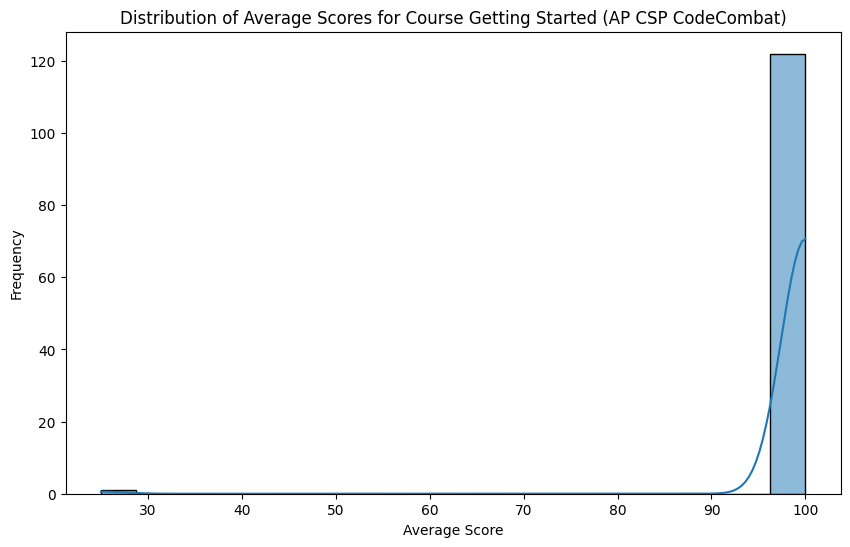

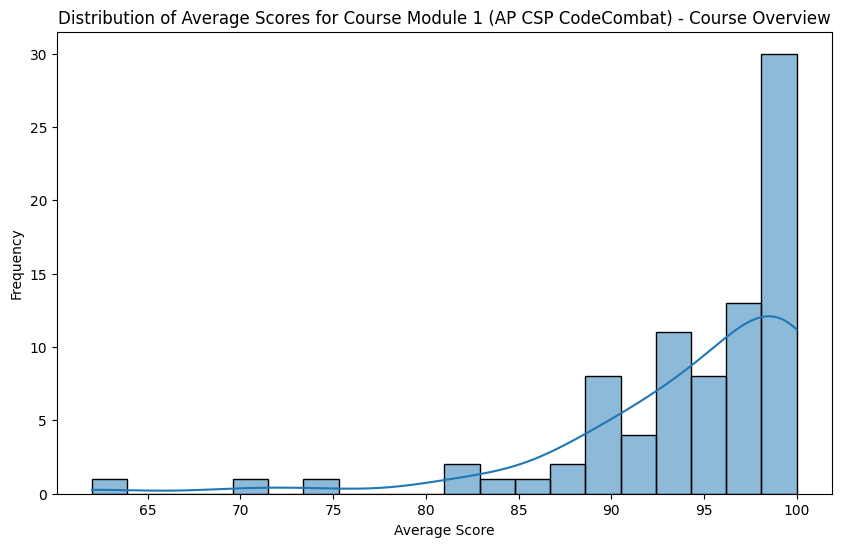

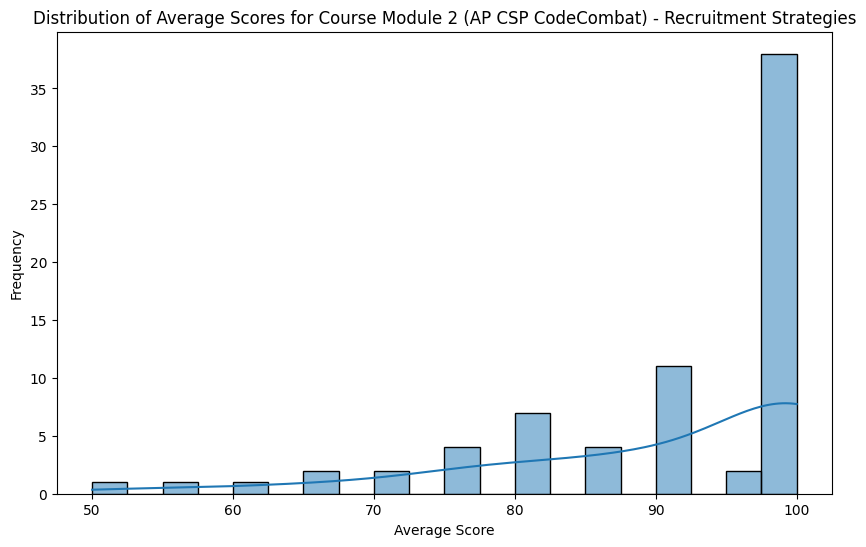

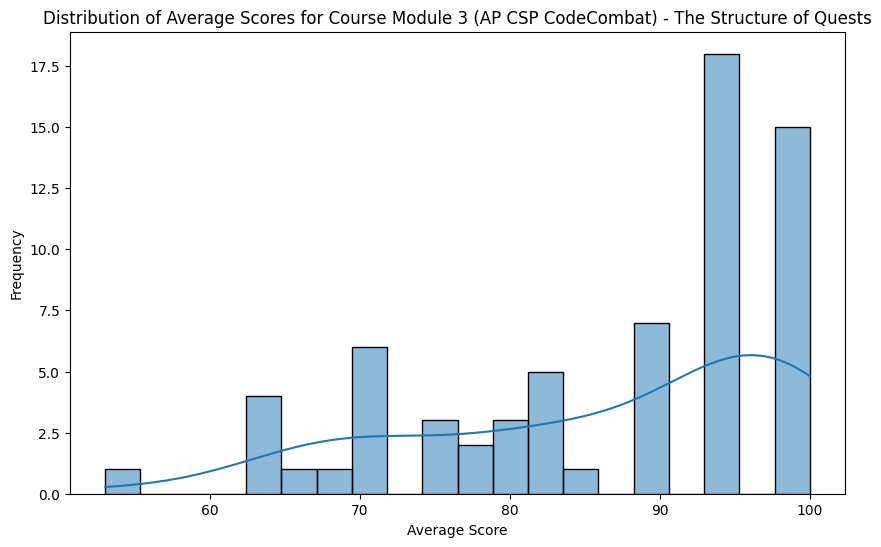

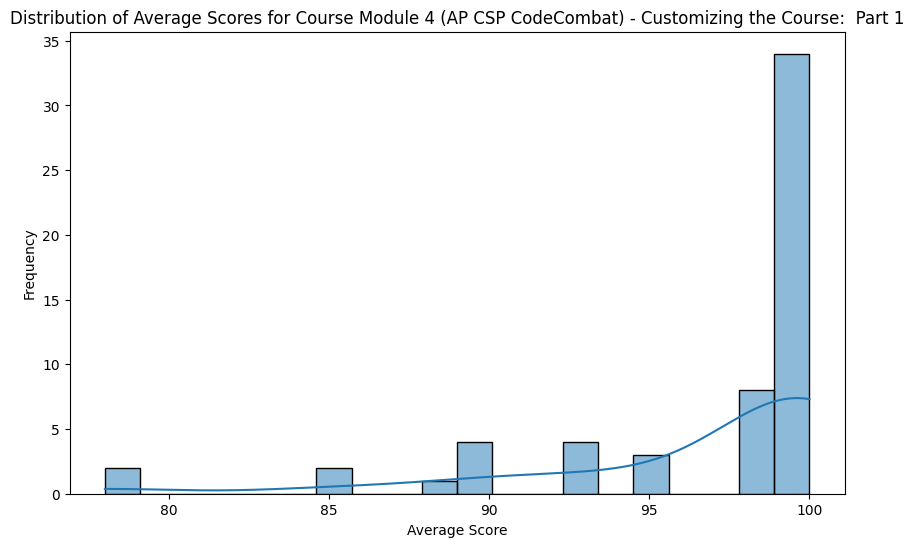

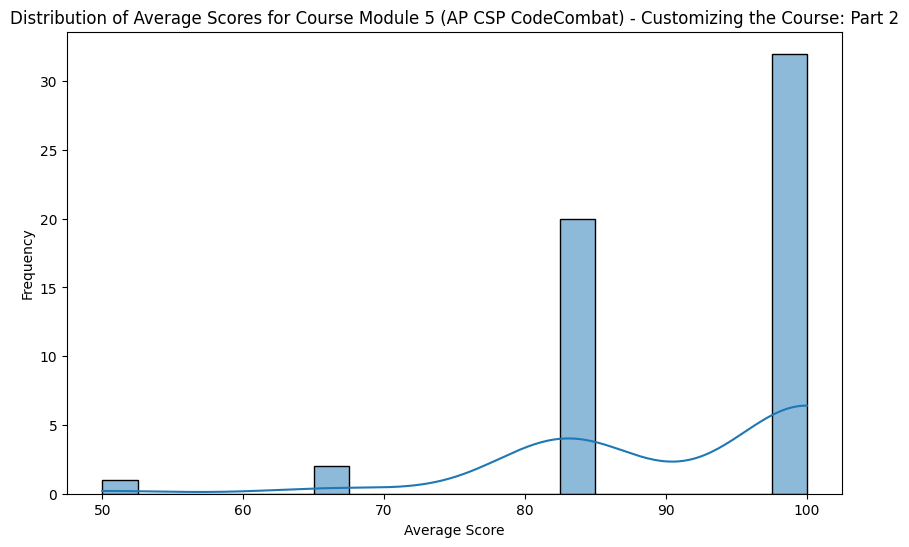

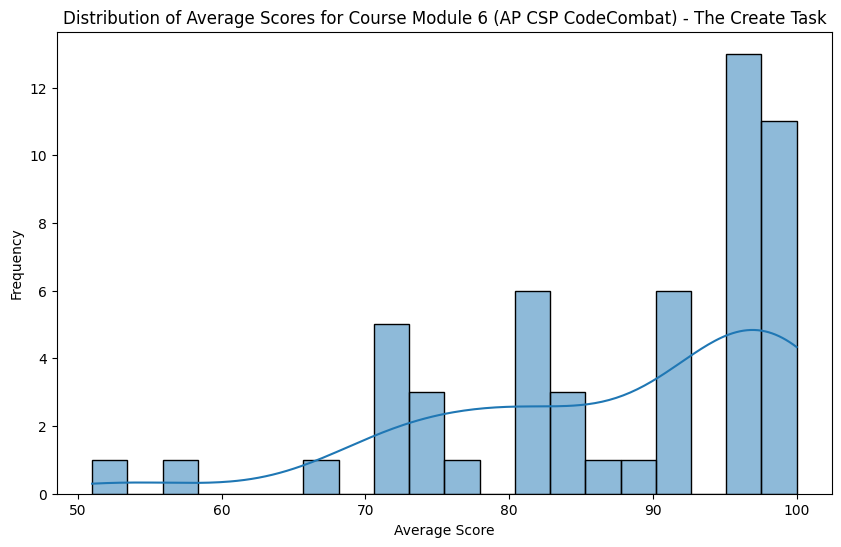

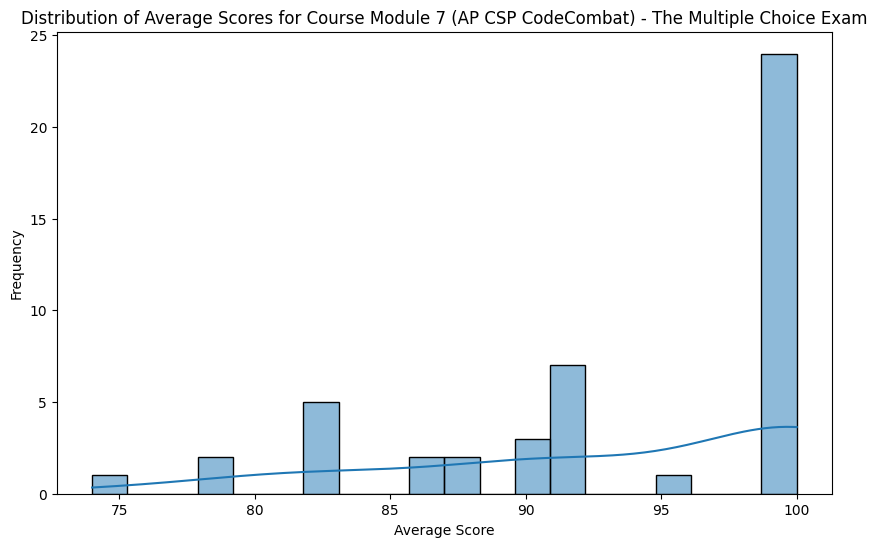

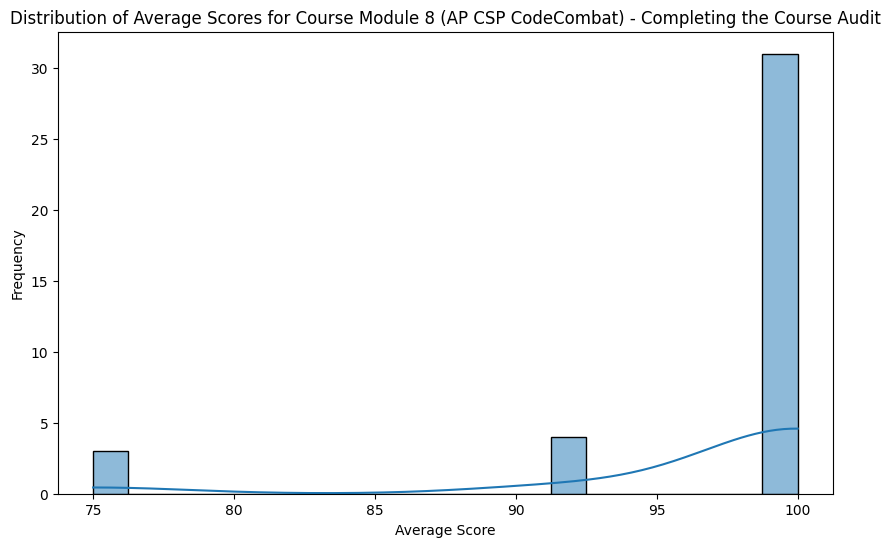

In [6]:
for course, data in grouped:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Average Score'], kde=True, bins=20)
    plt.title(f'Distribution of Average Scores for Course {course}')
    plt.xlabel('Average Score')
    plt.ylabel('Frequency')
    plt.show()


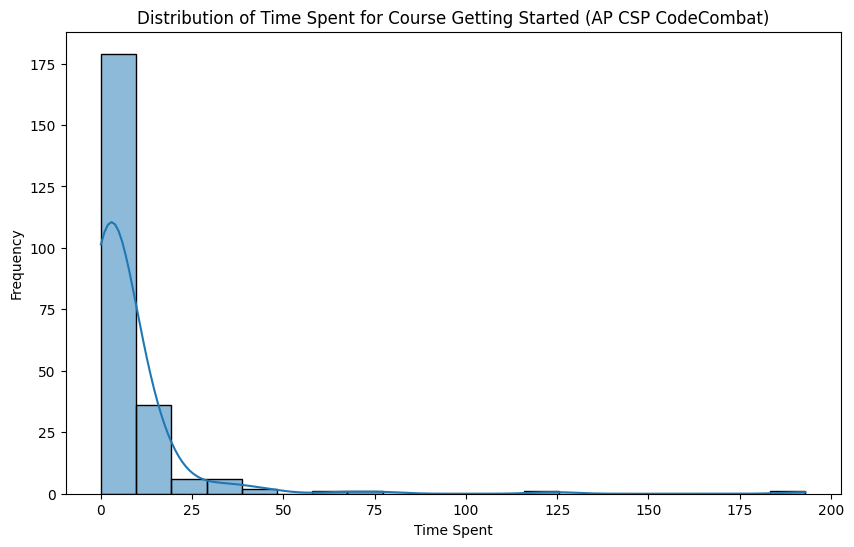

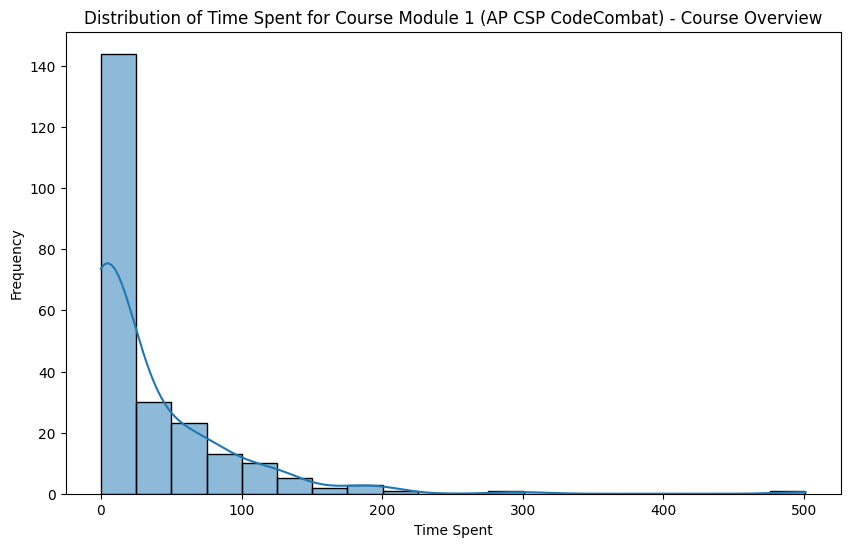

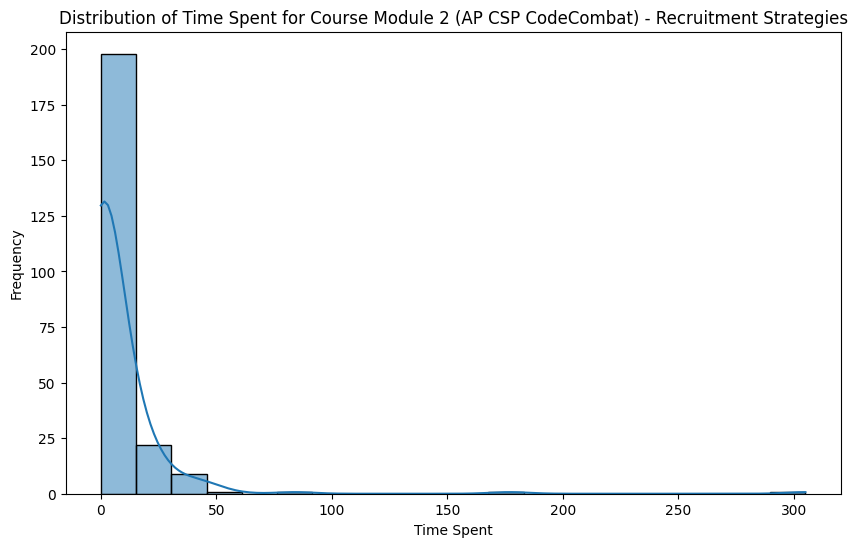

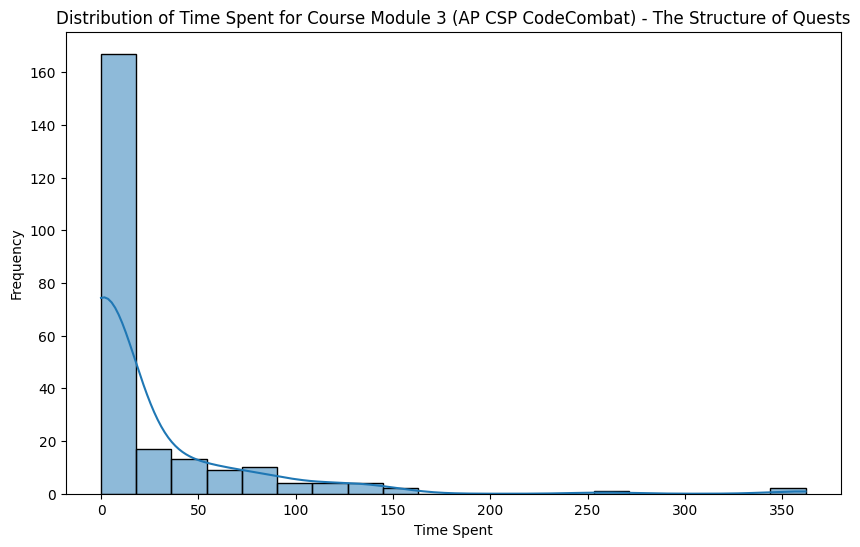

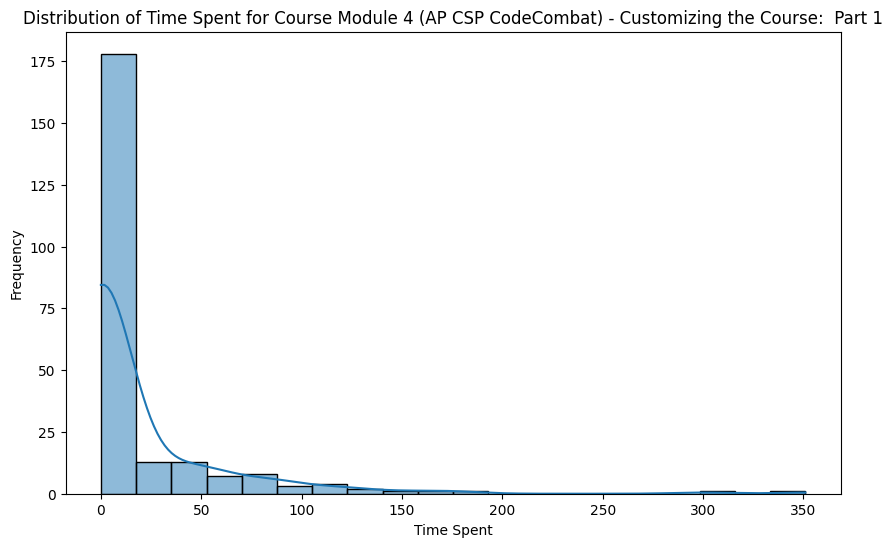

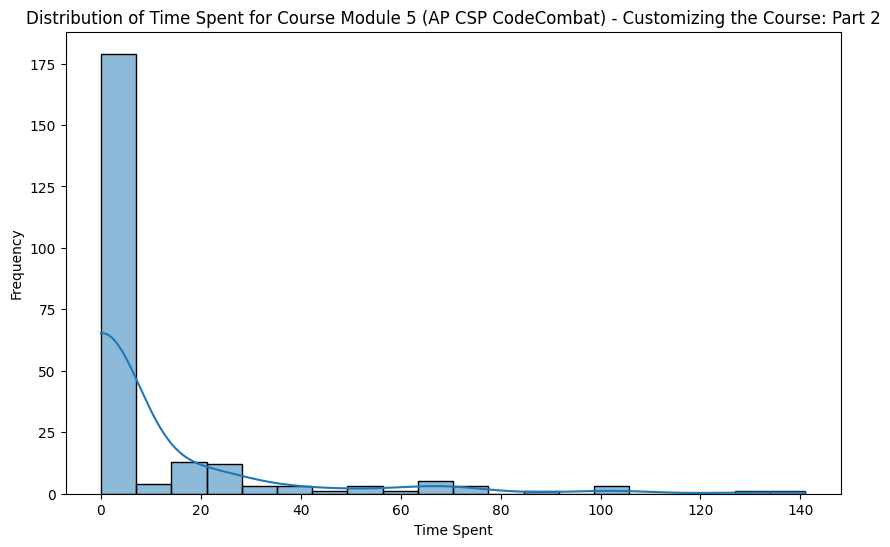

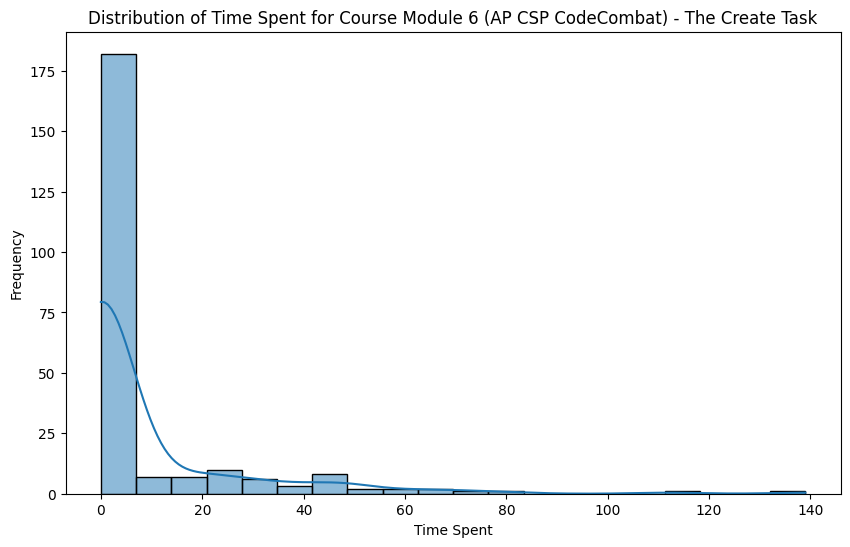

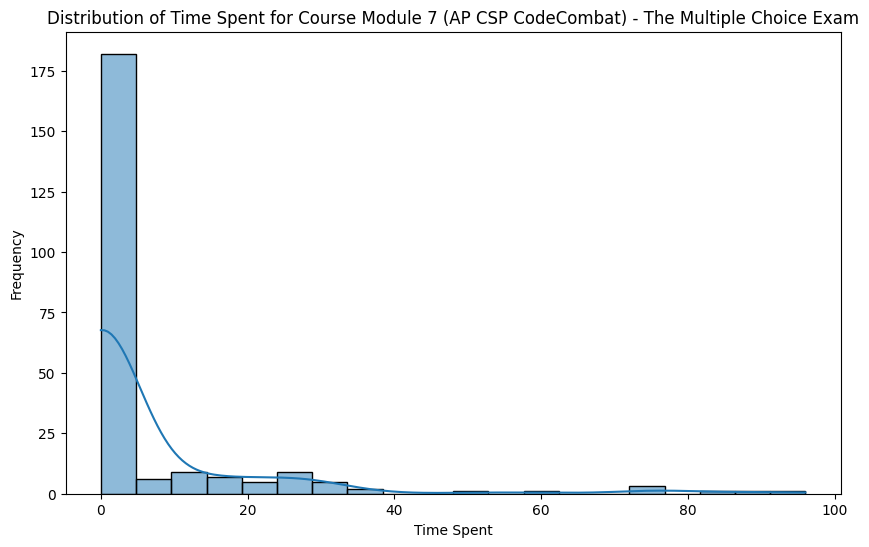

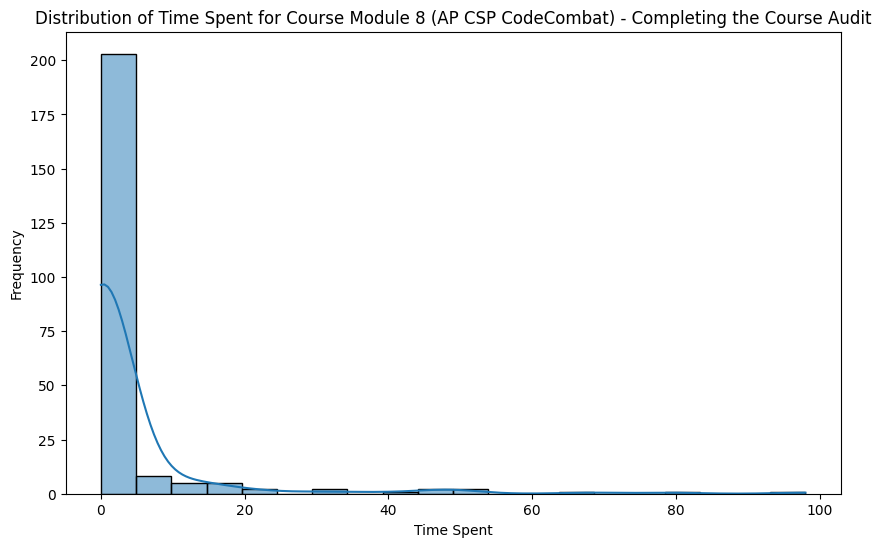

In [26]:

for course, data in grouped:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Time Spent (min)'], kde=True, bins=20)
    plt.title(f'Distribution of Time Spent for Course {course}')
    plt.xlabel('Time Spent')
    plt.ylabel('Frequency')
    plt.show()


## 3. Box Plots of Average Scores and Time Spent per Course

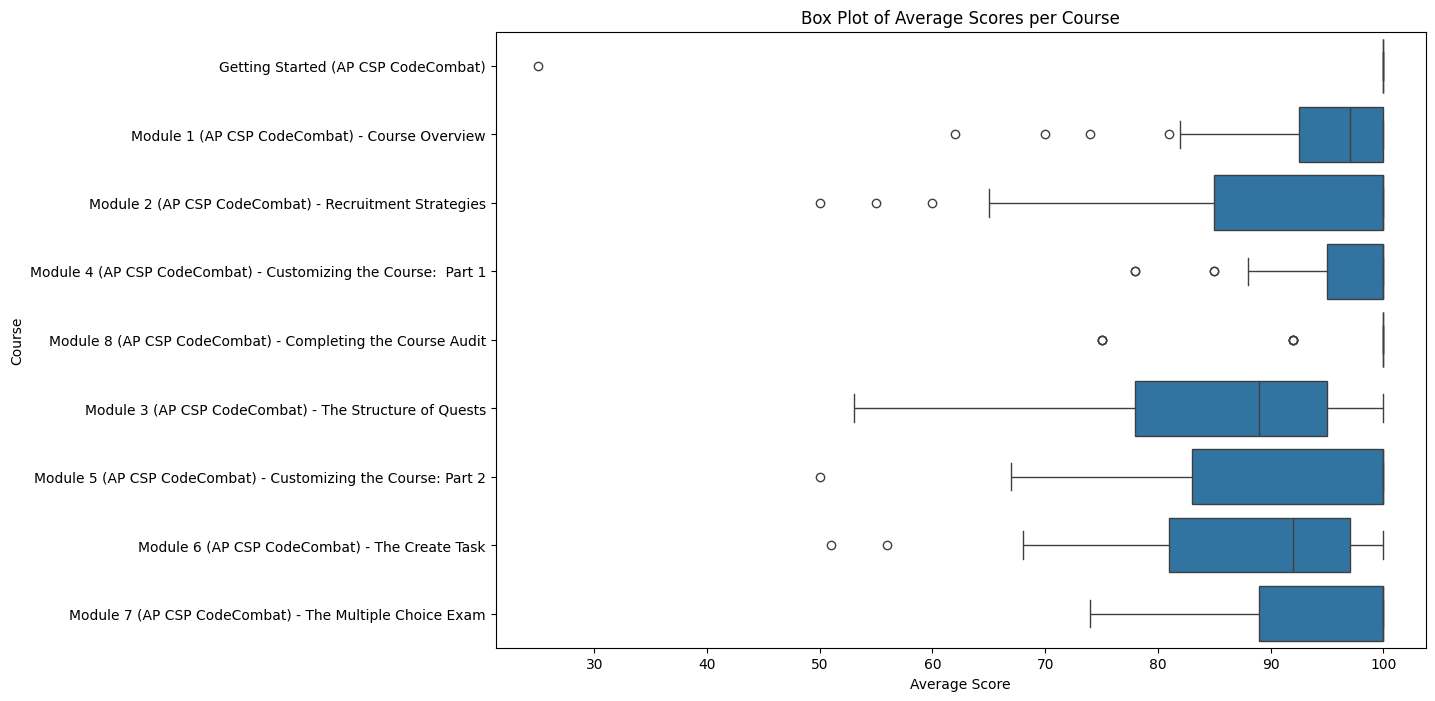

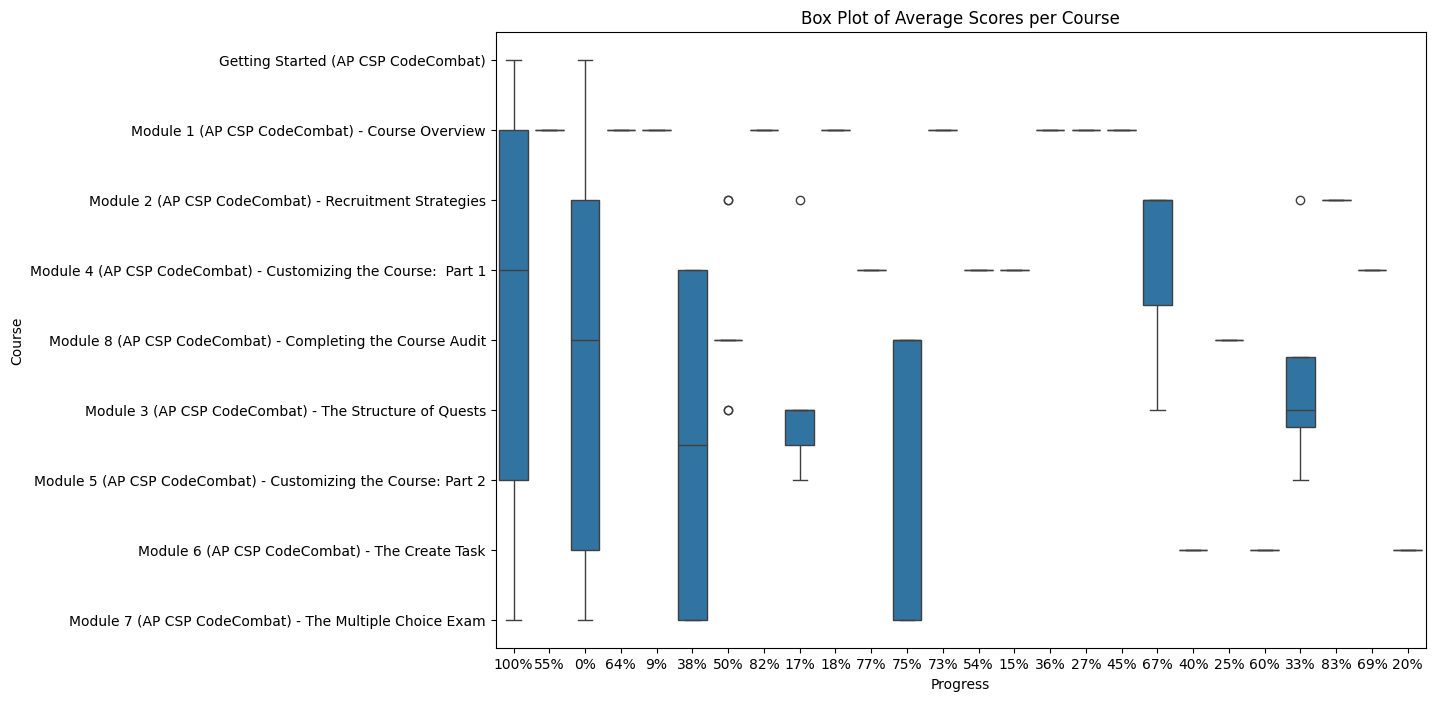

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Average Score', y='Course', data=df)
plt.title('Box Plot of Average Scores per Course')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Progress', y='Course', data=df)
plt.title('Box Plot of Average Scores per Course')
plt.show()

# plt.figure(figsize=(12, 8))
# sns.boxplot(x='Course', y='Time Spent (min)', data=df)
# plt.title('Box Plot of Time Spent per Course')
# plt.show()


## 4. Bar Plot of Average Scores per Course

/var/folders/s7/91zjcdr93sd1ps6g_3g3fpvw0000gn/T/ipykernel_93998/3122827051.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Course', y='Average Score', data=df, ci=None)


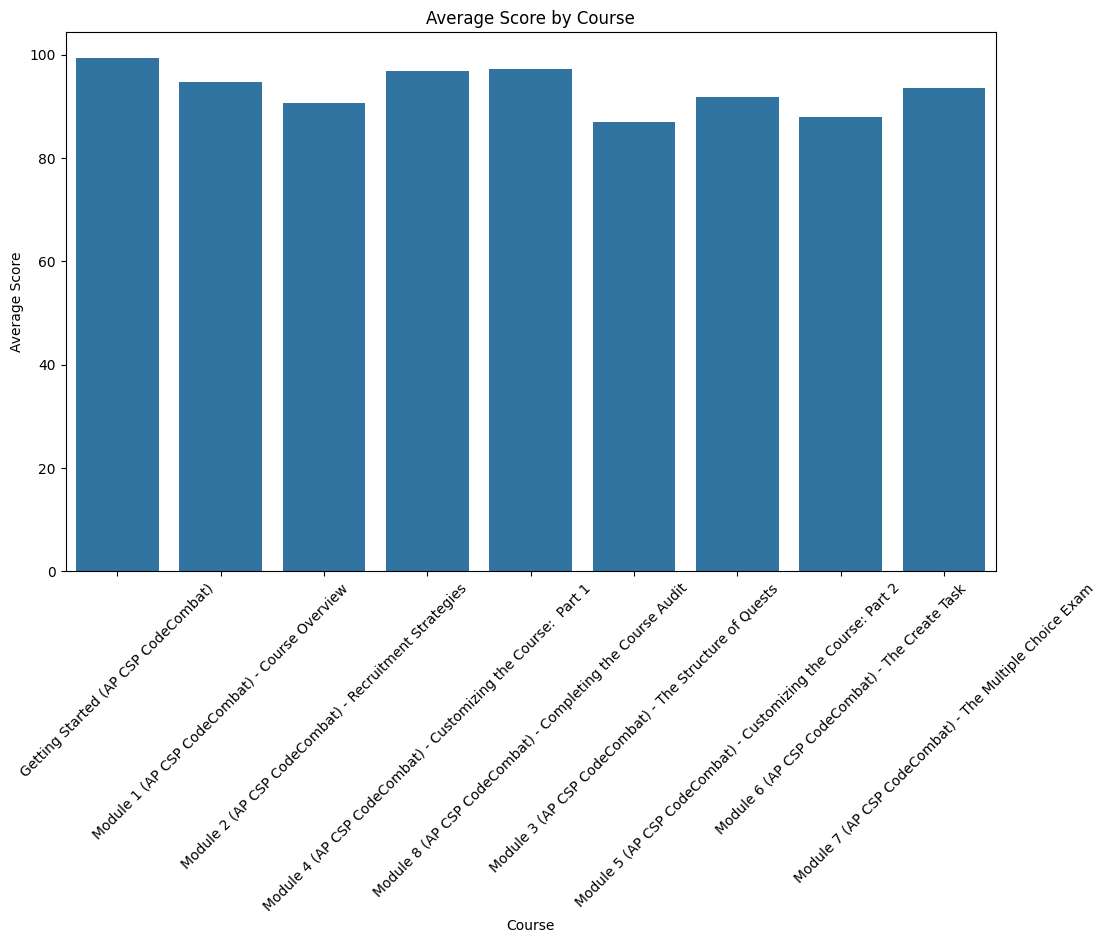

In [8]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Course', y='Average Score', data=df, ci=None)
plt.title('Average Score by Course')
plt.xlabel('Course')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['Progress (Percent)']

/var/folders/s7/91zjcdr93sd1ps6g_3g3fpvw0000gn/T/ipykernel_3300/581951338.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Course', y='Progress (Percent)', data=df, ci=None)


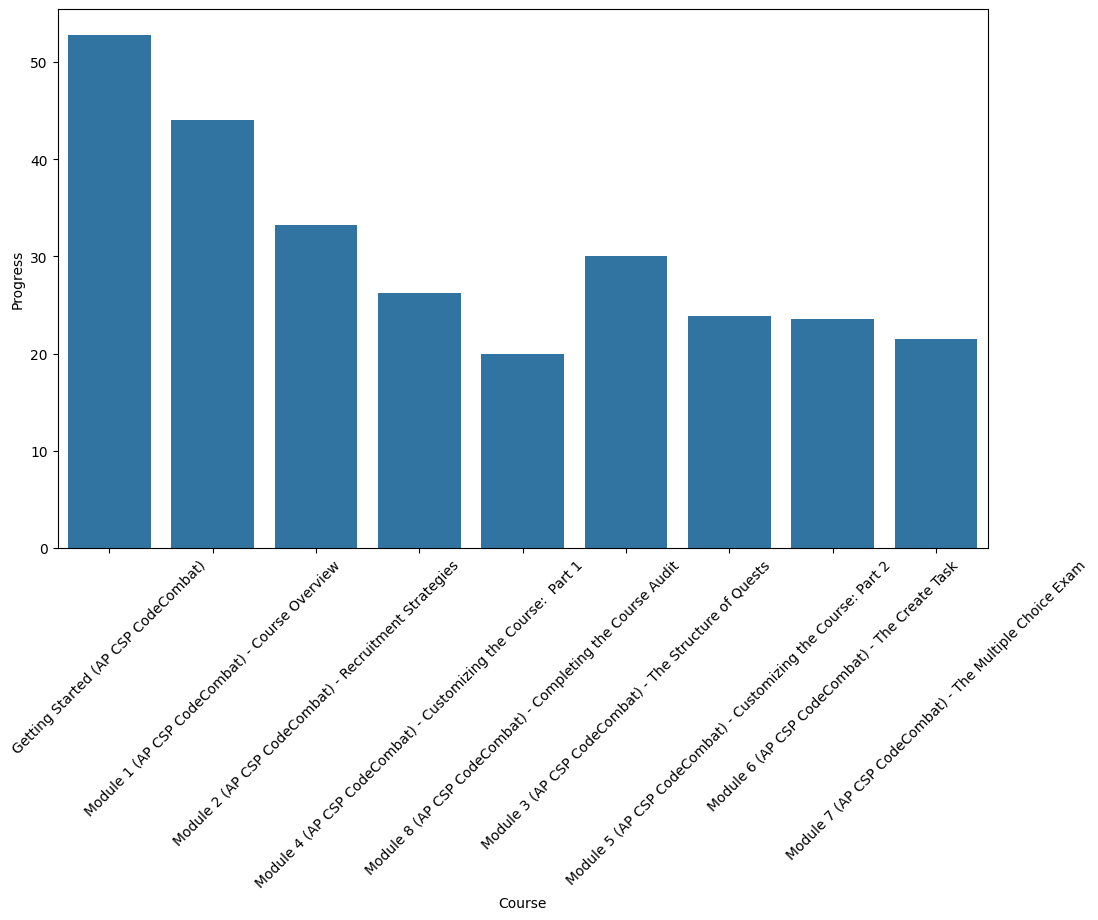

In [9]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Course', y='Progress (Percent)', data=df, ci=None)
# plt.title('Average Score by Course')
plt.xlabel('Course')
plt.ylabel('Progress')
plt.xticks(rotation=45)
plt.show()


## 5. Correlation Matrices

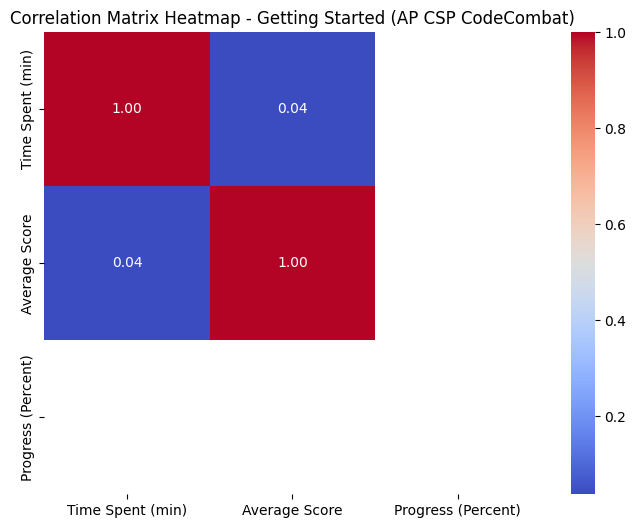

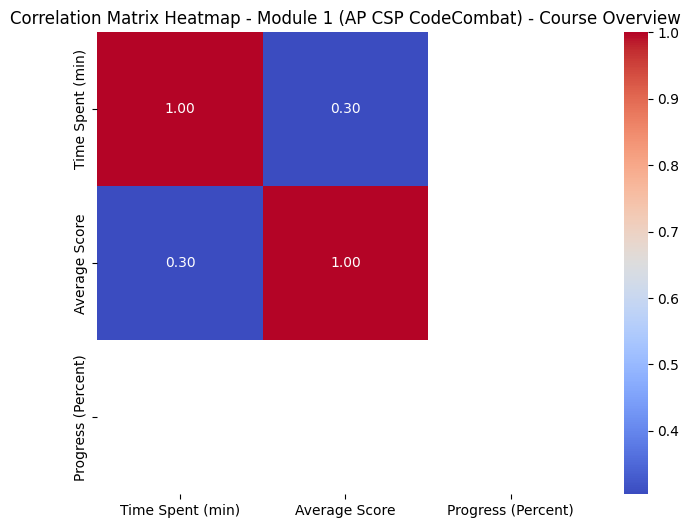

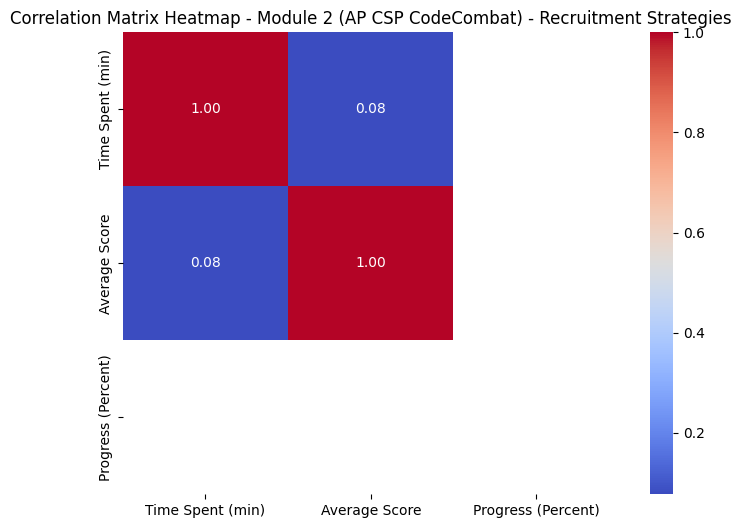

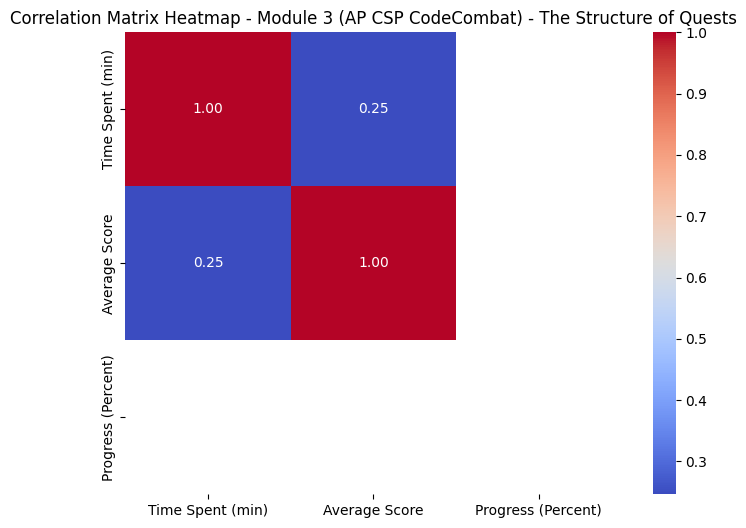

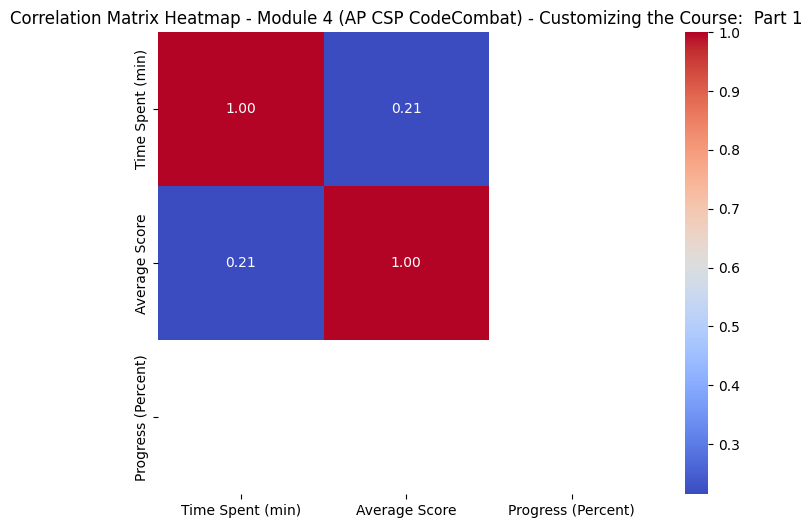

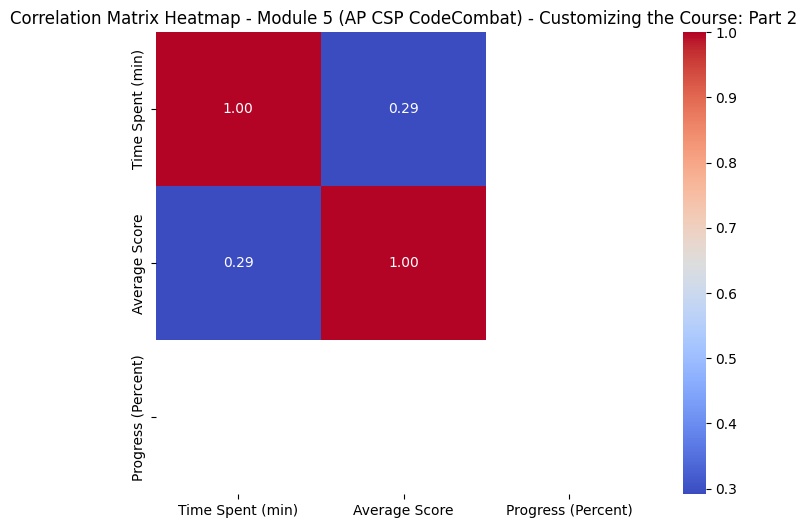

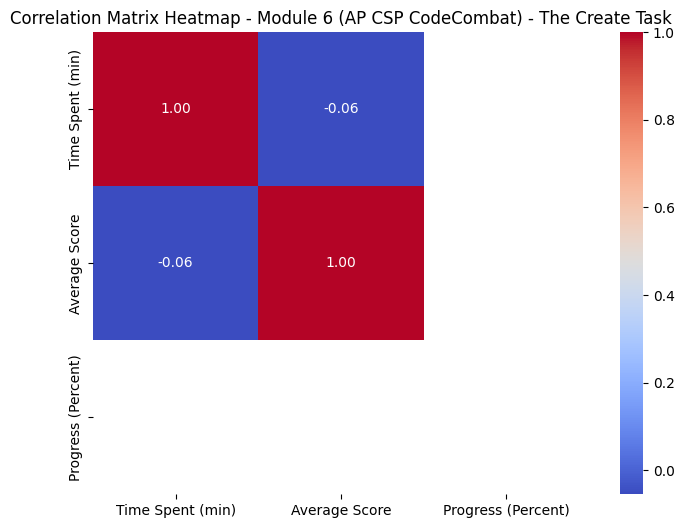

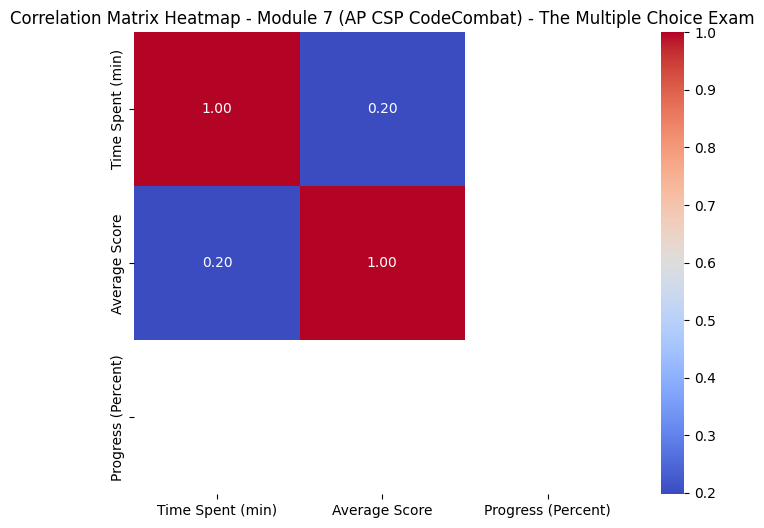

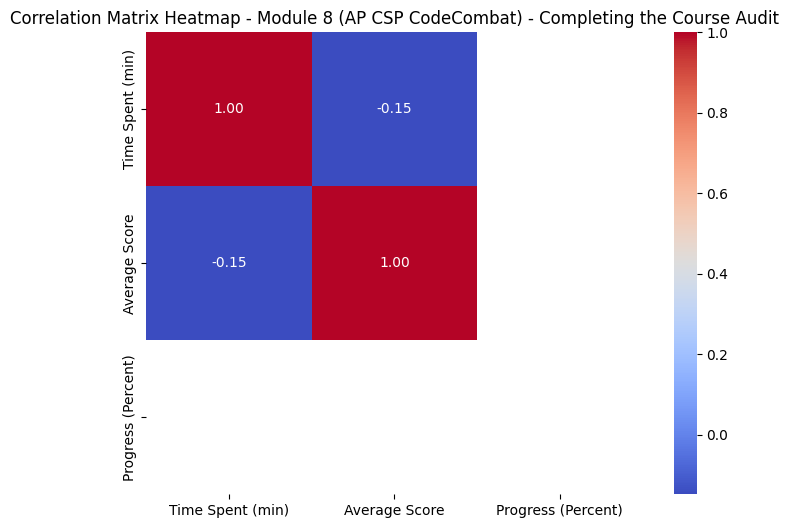

In [9]:
# Calculating the correlation matrix
cols_to_plot = ['Time Spent (min)', 'Average Score', 'Progress (Percent)']

for course, data in grouped:
	corr_matrix = data[cols_to_plot].corr()

	# Plotting the heatmap
	plt.figure(figsize=(8, 6))
	sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
	plt.title('Correlation Matrix Heatmap - ' + course)
	plt.show()


## 6. Z-Score Analyses

In [10]:
def calculate_z_scores(group, column_name):
    # Mean and standard deviation for the column within the group
    mean = group[column_name].mean()
    std = group[column_name].std()
    
    # Calculating Z-score only if std is not 0 to avoid division by zero
    if std > 0:
        group[column_name + ' Z-Score'] = (group[column_name] - mean) / std
    else:
        group[column_name + ' Z-Score'] = 0  # If std is 0, all values are the same and hence their Z-score is 0
    return group

# Ensure 'Course' is not set as index to avoid ambiguity
if 'Course' not in df.columns:
    df.reset_index(inplace=True)

# Apply the Z-score calculation for each course and for the 'Average Score' and 'Time Spent (min)' columns
df = df.groupby('Course', as_index=False).apply(calculate_z_scores, 'Average Score')
df = df.groupby('Course', as_index=False).apply(calculate_z_scores, 'Time Spent (min)')

# After applying, reset the index to flatten the DataFrame and avoid the hierarchical index
df.reset_index(drop=True, inplace=True)


/var/folders/s7/91zjcdr93sd1ps6g_3g3fpvw0000gn/T/ipykernel_93998/1829855965.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Course', as_index=False).apply(calculate_z_scores, 'Average Score')
/var/folders/s7/91zjcdr93sd1ps6g_3g3fpvw0000gn/T/ipykernel_93998/1829855965.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Course', as_index=False).apply(calculate_z_scores,

In [24]:
# Identifying outliers based on Z-scores (e.g., Z < -2 or Z > 2)
outliers_avg_score = df[(df['Average Score Z-Score'] < -2) | (df['Average Score Z-Score'] > 2)]
outliers_time_spent = df[(df['Time Spent (min) Z-Score'] < -2) | (df['Time Spent (min) Z-Score'] > 2)]

print("Outliers in Average Score:", outliers_avg_score[['Course', 'User Details', 'Average Score', 'Average Score Z-Score']])
print("Outliers in Time Spent:", outliers_time_spent[['Course', 'User Details', 'Time Spent (min)', 'Time Spent (min) Z-Score']])


Outliers in Average Score:                                                 Course     User Details  \
40                 Getting Started (AP CSP CodeCombat)      Dilek Ergül   
144     Module 1 (AP CSP CodeCombat) - Course Overview   emmanuel kepas   
176     Module 1 (AP CSP CodeCombat) - Course Overview        Dương Nga   
194     Module 1 (AP CSP CodeCombat) - Course Overview      Jesus Casim   
207  Module 2 (AP CSP CodeCombat) - Recruitment Str...      Jody Norton   
212  Module 2 (AP CSP CodeCombat) - Recruitment Str...      Joy Gleason   
226  Module 2 (AP CSP CodeCombat) - Recruitment Str...  Danielle Record   
227  Module 2 (AP CSP CodeCombat) - Recruitment Str...        JJ Heesch   
269  Module 2 (AP CSP CodeCombat) - Recruitment Str...     Julie pearce   
330  Module 3 (AP CSP CodeCombat) - The Structure o...       Brian Aldo   
361  Module 4 (AP CSP CodeCombat) - Customizing the...        JJ Heesch   
365  Module 4 (AP CSP CodeCombat) - Customizing the...    Rae Danielson  

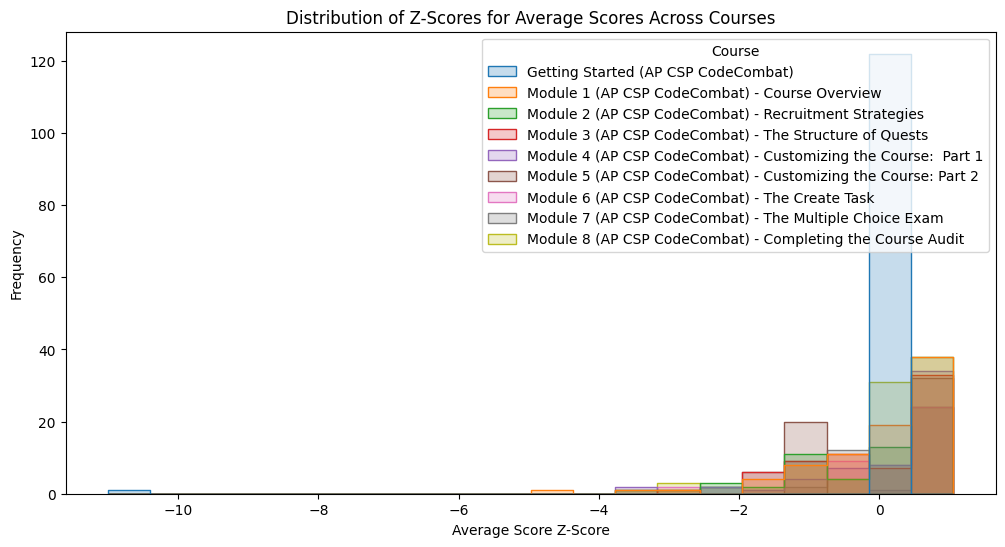

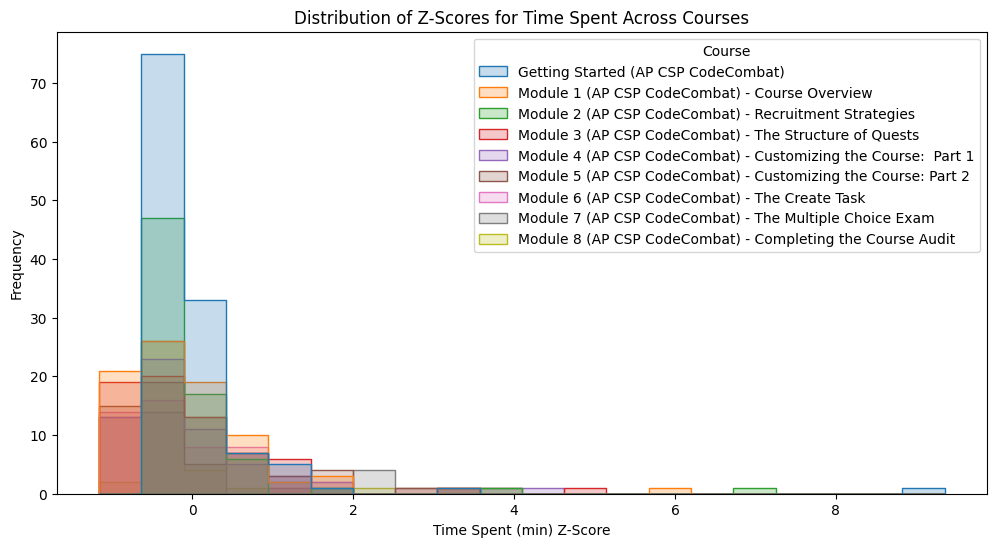

In [20]:
# Visualizing Z-score distributions for 'Average Score'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Average Score Z-Score', hue='Course', element='step', palette='tab10', bins=20)
plt.title('Distribution of Z-Scores for Average Scores Across Courses')
plt.xlabel('Average Score Z-Score')
plt.ylabel('Frequency')
plt.show()

# Visualizing Z-score distributions for 'Time Spent (min)'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Time Spent (min) Z-Score', hue='Course', element='step', palette='tab10', bins=20)
plt.title('Distribution of Z-Scores for Time Spent Across Courses')
plt.xlabel('Time Spent (min) Z-Score')
plt.ylabel('Frequency')
plt.show()


/var/folders/s7/91zjcdr93sd1ps6g_3g3fpvw0000gn/T/ipykernel_93998/3039413122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Course', y='Average Score Z-Score', data=df, palette='coolwarm')


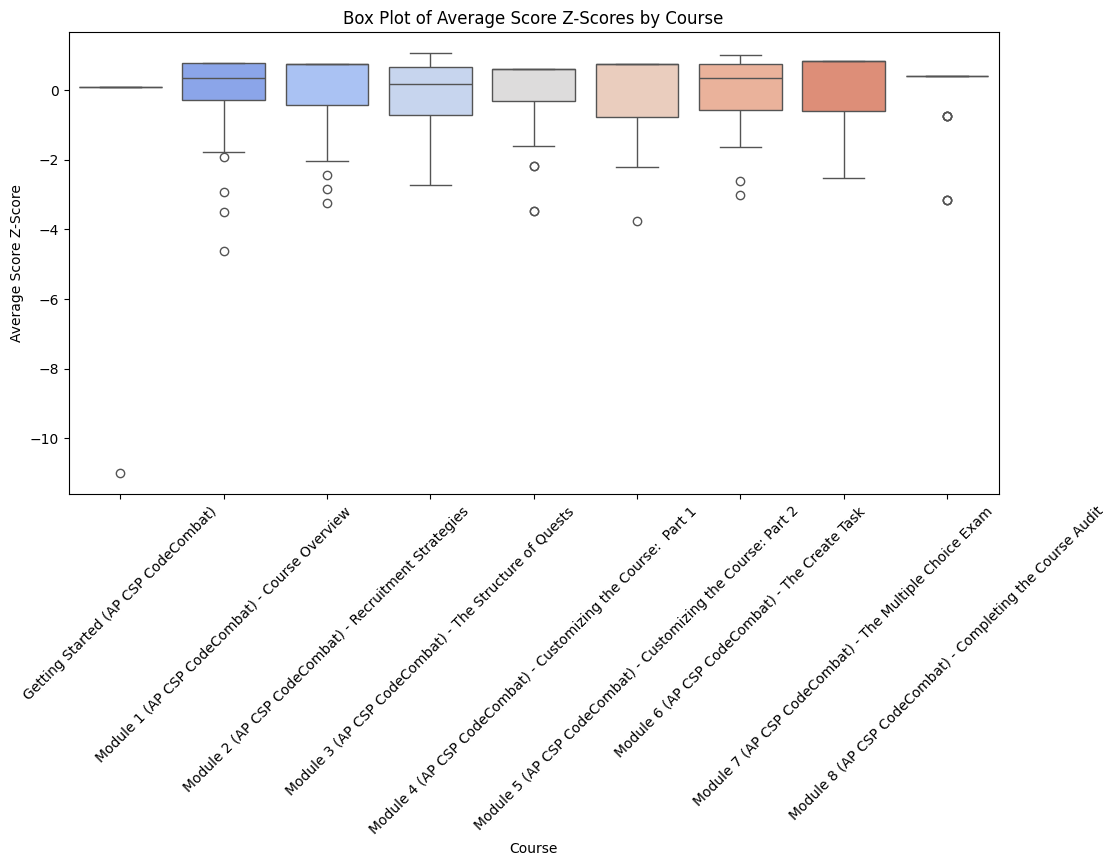

/var/folders/s7/91zjcdr93sd1ps6g_3g3fpvw0000gn/T/ipykernel_93998/3039413122.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Course', y='Time Spent (min) Z-Score', data=df, palette='coolwarm')


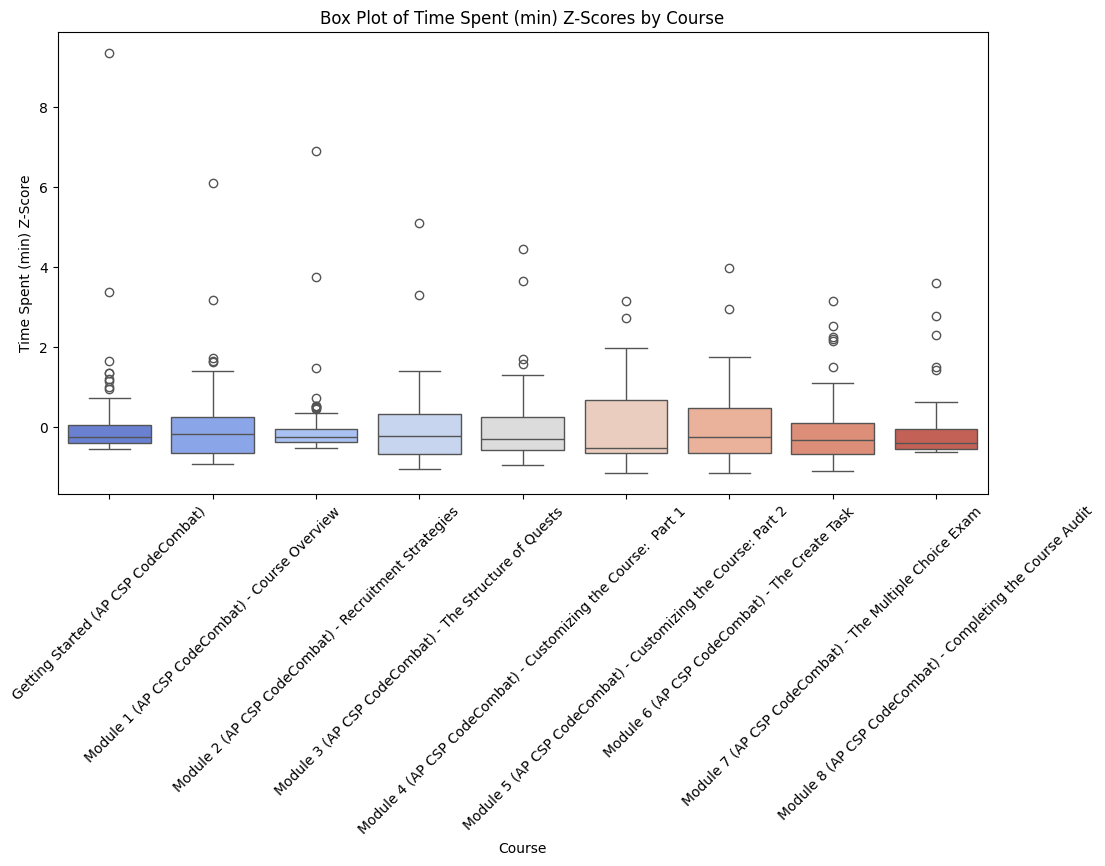

In [13]:
# Box plot for 'Average Score Z-Score'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Course', y='Average Score Z-Score', data=df, palette='coolwarm')
plt.title('Box Plot of Average Score Z-Scores by Course')
plt.xticks(rotation=45)
plt.show()

# Box plot for 'Time Spent (min) Z-Score'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Course', y='Time Spent (min) Z-Score', data=df, palette='coolwarm')
plt.title('Box Plot of Time Spent (min) Z-Scores by Course')
plt.xticks(rotation=45)
plt.show()


## 7. Pearson Correlation Coefficient

In [14]:
# Assuming 'df' is your DataFrame
grouped = df.groupby('Course')

for course, group in grouped:
    score_time_corr, p_value = pearsonr(group['Average Score'].dropna(), group['Time Spent (min)'].dropna())
    print(f"Course: {course}")
    print(f"Pearson correlation coefficient between 'Average Score' and 'Time Spent (min)': {score_time_corr:.3f}")
    print(f"P-value: {p_value:.3f}\n")


Course: Getting Started (AP CSP CodeCombat)
Pearson correlation coefficient between 'Average Score' and 'Time Spent (min)': 0.037
P-value: 0.683

Course: Module 1 (AP CSP CodeCombat) - Course Overview
Pearson correlation coefficient between 'Average Score' and 'Time Spent (min)': 0.305
P-value: 0.005

Course: Module 2 (AP CSP CodeCombat) - Recruitment Strategies
Pearson correlation coefficient between 'Average Score' and 'Time Spent (min)': 0.077
P-value: 0.516

Course: Module 3 (AP CSP CodeCombat) - The Structure of Quests
Pearson correlation coefficient between 'Average Score' and 'Time Spent (min)': 0.247
P-value: 0.044

Course: Module 4 (AP CSP CodeCombat) - Customizing the Course:  Part 1
Pearson correlation coefficient between 'Average Score' and 'Time Spent (min)': 0.215
P-value: 0.106

Course: Module 5 (AP CSP CodeCombat) - Customizing the Course: Part 2
Pearson correlation coefficient between 'Average Score' and 'Time Spent (min)': 0.291
P-value: 0.031

Course: Module 6 (AP CS